In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        Sharma\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-

#### <font color = red> Importing a SMS data into a List Comprehension

In [2]:
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection")]

In [6]:

#print(messages)

In [11]:
messages[2122]

'ham\tIn xam hall boy asked girl Tell me the starting term for dis answer I can den manage on my own After lot of hesitation n lookin around silently she said THE! intha ponnungale ipaditan;)'

In [9]:
len(messages)

5574

In [12]:
# Printing the First 10 messages with the Number the Messages

for msg_no,message in enumerate(messages[:10]):
    print(msg_no,message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

<font color = green> <b> We can see from above that msg no. 2,5,8 and o are Spam

#### <font color = red> Converting into Data Frame

In [13]:
# The Following File Is the Tab Seperated File (tsv), where first column is label(spam or Ham) and second col. is msg.
# Using Pandas we will try to parse the file

import pandas as pd

messages = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=["Labels", "Message"])

In [14]:
messages

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<font color = green> <b> Now we have Data Frame containing Label and Message as column

In [15]:
# Checking the Stats Of the Mssage Data Frme

messages.describe()

,Labels,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
# Using Groupby to  use the Describe method by Actual Labels

messages.groupby('Labels').describe()

Message                                                               
         count unique                                                top freq
Labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

#### <font color = red> Feature Engineering is one of the most important part of the Test Analytics and Specially Spam Detection

In [17]:
# Adding the Column Containing length of the message

messages["Length"] = messages['Message'].apply(len)
messages.head(10)

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


<AxesSubplot:xlabel='Length', ylabel='Count'>

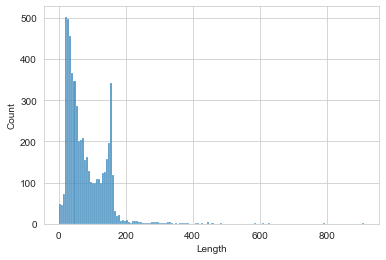

In [18]:
# Visualizing the Length of the Messages

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

sns.histplot(messages['Length'], bins=150)

<font color = green> <b> As we increase the no. of bins in the Above plot, we can se that there is bi-model behavior, there is peak at the  lower end as well as the peak at the higher end

<font color = green> <b> We can say that Length is one of the Important Feature going forward.
we can also see the Length of the Messages is range upto arroung 900-1000. As there are some very long messages

In [19]:
# Checking the Stats of the Length Column

messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [20]:
# Exploring the Message with the Max Length

messages[messages["Length"]==910]["Message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [21]:
# On the Basis of the Lable

messages.groupby("Labels").describe()["Length"]

,count,mean,std,min,25%,50%,75%,max
Labels,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


<Figure size 864x360 with 0 Axes>

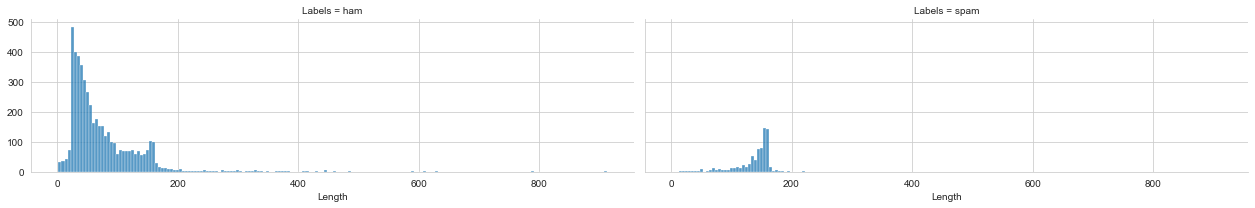

In [22]:
# Plotting the length of Messages on the Basis of Labels

plt.figure(figsize=(12,5))
x = sns.FacetGrid(data=messages, col="Labels", aspect=41.7/14.27)
x.map(sns.histplot, "Length", binwidth=5)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

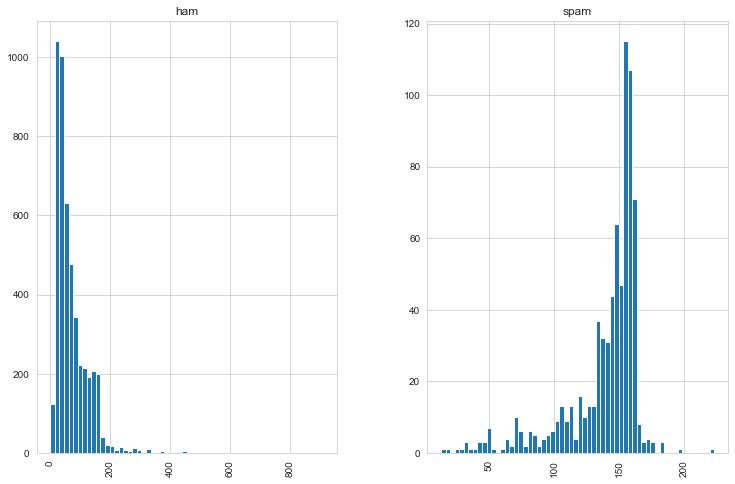

In [23]:
# Using Pandas In-built Plot

messages.hist(column="Length", by="Labels", bins=60, figsize=(12,8))

<font color = green> <b> From the Abve Plot We can see that Ham message is distributed arroung 50-100, where as Spam messages is Distributed arroung 140-160.
Span Messeges avg. Length is Higher than Ham Messages

### <font color = red> Text Pre-processing
#### <font color = red> Converting Text msgs into Vectors Using Bag of Words Concept

<b> The Main issue of our Data is all is in Text format or String. Classification  algorithm requried some sort of Numerical Vectors in order to perform the classificatio.
The Simplest Approch to convert the corpse of words into numerical Vector is Bag of words, where each, where each unique word in the text is represented by one number.

In [71]:
import string
from nltk.corpus import stopwords

In [77]:
# Create a finction to split the words in the message and return the list.
# Remove the Punctuations
# Also will remove the stop words like a, the, are using the package "Stopwrods", we have downloaded from the nltk

<font color =blue> <b> Concept



In [72]:
msg = "Hello! My Name is Deepak Sharma. I lives in Gurgaon."

In [74]:
nopunc = [x for x in msg if x not in string.punctuation]

In [75]:
nopunc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'y',
 ' ',
 'N',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'D',
 'e',
 'e',
 'p',
 'a',
 'k',
 ' ',
 'S',
 'h',
 'a',
 'r',
 'm',
 'a',
 ' ',
 'I',
 ' ',
 'l',
 'i',
 'v',
 'e',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'G',
 'u',
 'r',
 'g',
 'a',
 'o',
 'n']

In [76]:
nopunc = "".join(nopunc)
nopunc

'Hello My Name is Deepak Sharma I lives in Gurgaon'

In [79]:
clean_msg = [x for x in nopunc.split() if x.lower() not in stopwords.words("english")]
clean_msg

['Hello', 'Name', 'Deepak', 'Sharma', 'lives', 'Gurgaon']

<font color = blue> <b> Creating a Function as per the Above Concept

In [80]:
def text_process(mess):
    
    # removing the punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #remove the stop words
    nopunc = ''.join(nopunc)
    
    # Return List of Clean Text
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [81]:
messages.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [82]:
# Tokenize the messages from the Message DataFrame

messages["Message"].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

<font color = Blue> <b> Vectorization

<b> We'll do that in three steps using the bag-of-words model:

- Count how many times does a word occur in each message (Known as term frequency)

- Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

- Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [83]:
# Using CountVectorizer method from Sklearn.
# This model will convert a collection of text documents to a matrix of token counts.
# Return a 2D rows wtih row as all the words in the corpus and Column as particular Message

from sklearn.feature_extraction.text import CountVectorizer

In [84]:
bow_transform = CountVectorizer(analyzer=text_process).fit(messages['Message'])

In [85]:
# Checking the Length

print(len(bow_transform.vocabulary_))

11425


<font color = green> <b> There are 11425 words in out vocabulary

In [90]:
# Taking On Sample msg and checking its bag of words count

msg4 = messages["Message"].iloc[3]
print("The Original Msg is",msg4)
bow4 = bow_transform.transform([msg4])
print(bow4)
print(bow4.shape)

The Original Msg is U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


<font color = green> <b> There are 7 unique words in the Message 4 after removing punctuation and stopwords, and 2 of them have been repeated twice.

In [94]:
# Checking the 2 repeated words
print(bow_transform.get_feature_names()[4068])
print(bow_transform.get_feature_names()[9554])

U
say


<font color = blue><b> Creating a Data Frame of the Tranforom Messaged

In [95]:
# We will use the .Transform() method. 
# The 2D matrix created is a Sparse Matrix(Matrix with most element = 0)

messages_bow = bow_transform.transform(messages["Message"])

In [97]:
# Shape of the Sparse Matrix
print("The Shape of Sparse Matrix:", messages_bow.shape)
print("The Total No. of elements: ", messages_bow.shape[0]*messages_bow.shape[1])
print("The Number of Non-Zero Element", messages_bow.nnz)

The Shape of Sparse Matrix: (5572, 11425)
The Total No. of elements:  63660100
The Number of Non-Zero Element 50548


In [99]:
# Caclulating the Sparsity of the Matrix
# Sparsity is % of Zero values element in the Matrix

sparsity = (100 * messages_bow.nnz) / (messages_bow.shape[0]*messages_bow.shape[1])
print("The Sparsity if the Transform Matrix is: ", 1-sparsity)

The Sparsity if the Transform Matrix is:  0.9205970458733178


<font color = blue> <b> TF-IDF Transformer


TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [152]:
from sklearn.feature_extraction.text import TfidfTransformer

In [153]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [154]:
# Performing the Same on the single messgae to understand the Result

print("The TF-IDF transform for the message 4 is", tfidf_transformer.transform(bow4))
print("The TF-IDF transform for the message 5 is", tfidf_transformer.transform(bow5))

The TF-IDF transform for the message 4 is   (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067
The TF-IDF transform for the message 5 is   (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [124]:
# Checking the IDF for the Particular word from our bag of words vocubalary

tfidf_transformer.idf_[bow_transform.vocabulary_['university']]

8.527076498901426

In [125]:
# Converting Entire Bag of Word corpus into TF=IDF corpus

messages_TFIDF = tfidf_transformer.transform(messages_bow)

In [126]:
# Shape of the TFIDF matrix
messages_TFIDF.shape

(5572, 11425)

### <font color = red> Training the model (Spam-Ham Classifier)

<font color = red> <b> Using a Naive Base Classifier
  

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
spam_detect_model = MultinomialNB().fit(messages_TFIDF,messages['Labels'])

In [141]:
# Predicting for the Particular Message Msg4

print("The Predicted label for the message 4 is:", spam_detect_model.predict( tfidf_transformer.transform(bow4))[0])
print("The Expected label for the message 4 is: ", messages["Labels"].iloc[3])

The Predicted label for the message 4 is: ham
The Expected label for the message 4 is:  ham


In [142]:
# Predictiong for all Messages

all_predict = spam_detect_model.predict(messages_TFIDF)
all_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [188]:
print("Confusion Matrix:")
print(confusion_matrix(messages['Labels'], all_predict))
print("\n")
print("Classification Report:")
print(classification_report(messages['Labels'], all_predict))

Confusion Matrix:
[[4825    0]
 [ 115  632]]


Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



<font color = blue> <b> Train Test split
    
<font color = Black> Earlier we Train and Predicted on the Same data set. To evaluate the  model correctly we need to train and test the model on Different data set

In [143]:
from sklearn.model_selection import train_test_split

In [167]:
train_msg, test_msg, train_label, test_label = train_test_split(messages['Message'], messages['Labels'], test_size=0.30)

<font color = blue> <b> Creatinn A Pipeline of Whole Process

<font color = Black> <b> We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.    

In [168]:
from sklearn.pipeline import Pipeline

In [169]:
pipeline = Pipeline([
                    ("Bow", CountVectorizer(analyzer=text_process)),         # Strings to token Integer Count
                    ("TFIDF", TfidfTransformer()),                          # Integer Count to Weighter TF-IDF Score
                    ("Classifier", MultinomialNB())                          # Training the Model on Train Data set
                    ])

In [180]:
# Training the Model

pipeline.fit(train_msg,train_label)

Pipeline(steps=[('Bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024F0B597E50>)),
                ('TFIDF', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [182]:
# Predicting on the Test Data

prediction = pipeline.predict(test_msg)

### <font color = red> Evaluating the Model

In [185]:
from sklearn.metrics import classification_report, confusion_matrix

In [186]:
print("Confusion Matrix:")
print(confusion_matrix(prediction, test_label))
print("\n")
print("Classification Report:")
print(classification_report(prediction, test_label))

Confusion Matrix:
[[1431   86]
 [   0  155]]


Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      1517
        spam       0.64      1.00      0.78       155

    accuracy                           0.95      1672
   macro avg       0.82      0.97      0.88      1672
weighted avg       0.97      0.95      0.95      1672

